---

#  mplfinance plot customizations

---

### In this notebook, we demonstrate the use of various keyword arguments to customize:
- figure size and aspect ratio
- display of non-trading periods (weekends, holidays, after hours trading)
- figure title
- y-axis label
- x-axis datetime format
- x-axis labels rotation
- line color for line plot
- tight_layout
- fill_between

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

### Read in daily data for the S&P 500 from November of 2019 

In [3]:
daily = pd.read_csv('data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(2)
daily.tail(2)

(20, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01,3050.72,3066.95,3050.72,3066.91,510301237
2019-11-04,3078.96,3085.20,3074.87,3078.27,524848878


,Open,High,Low,Close,Volume
Date,,,,,
2019-11-27,3145.49,3154.26,3143.41,3153.63,421853938
2019-11-29,3147.18,3150.30,3139.34,3140.98,286602291


In [4]:
import mplfinance as mpf
mpf.__version__

'0.12.10b0'

---

- `figscale` is used to scale the size fo the figure up or down.

- `figscale=1.0` means that the _height_ of the plot will be the default height (see below);<br>&nbsp;&nbsp;&nbsp;&nbsp; the width of the plot will depend upon the aspect ratio.

- `figratio` modifies the aspect ratio of the plot.
  - specify a tuple (width,height) for `figratio`.
  
- `figscale` and `figratio` may be used independently (they do _not_ need to be specified together)

- If not specified, the default values (as of June 2020) are:
  - `figscale = 1.0`
  - `figratio = (8.00,5.75)`

(one may also specify simply `figsize` which _overrides both_ `figscale` and `figratio`<br> specifying explicitly, at the same time, both the size and aspect ratio of the figure.)

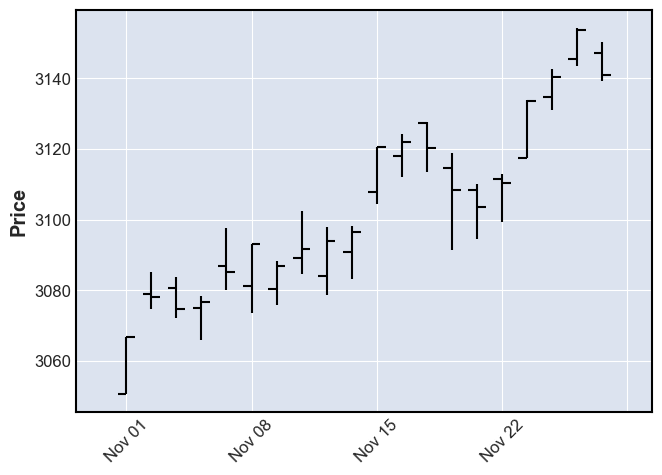

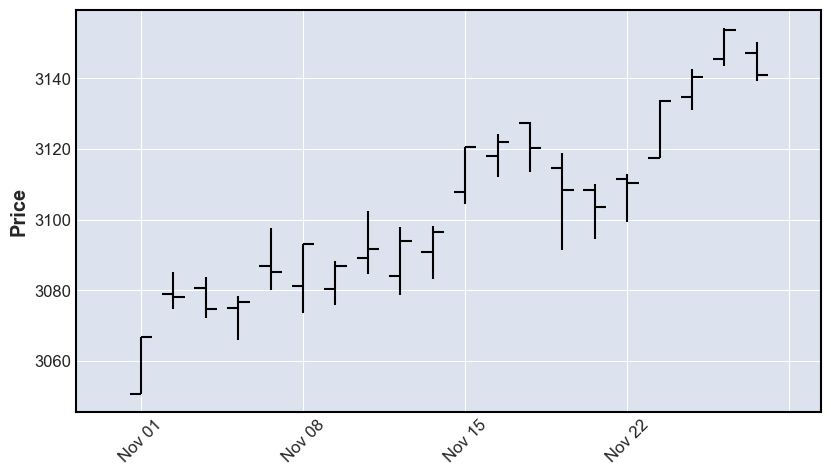

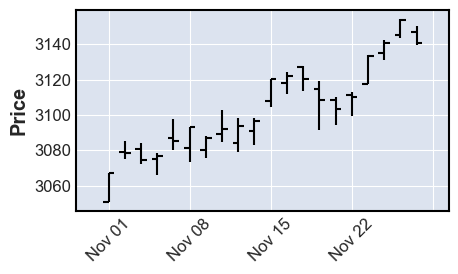

In [5]:
mpf.plot(daily)
mpf.plot(daily,figratio=(18,10))
mpf.plot(daily,figratio=(18,10),figscale=0.5)

#### Displaying non-trading periods

---

- Some users like to see gaps in the plot created by non-trading periods (days or, for intraday data, hours)
- Non-trading periods can be displayed using the **` show_nontrading `** kwarg.
- In the example below, these gaps make it easy to visualize weekend and the U.S. Thanksgiving Holiday.


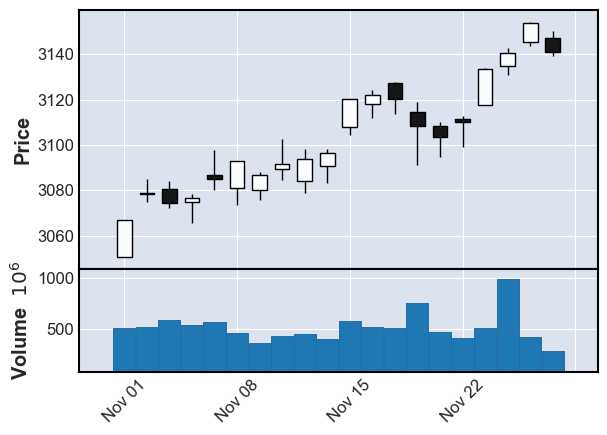

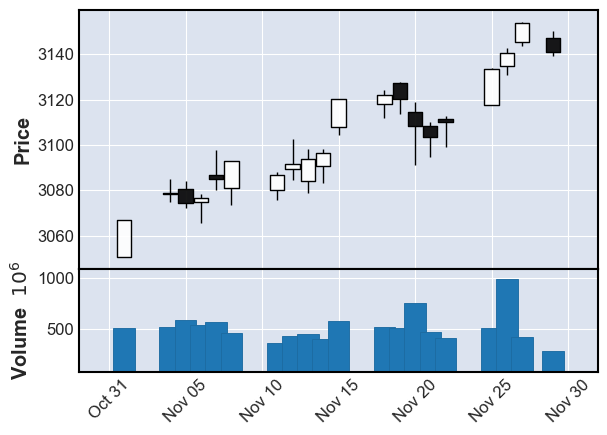

In [6]:
mpf.plot(daily,type='candle',volume=True,figscale=0.9)
mpf.plot(daily,type='candle',volume=True,figscale=0.9,show_nontrading=True)

---

---

#### Setting the Figure Title, the Y-axis Label, and the X-axis Label:

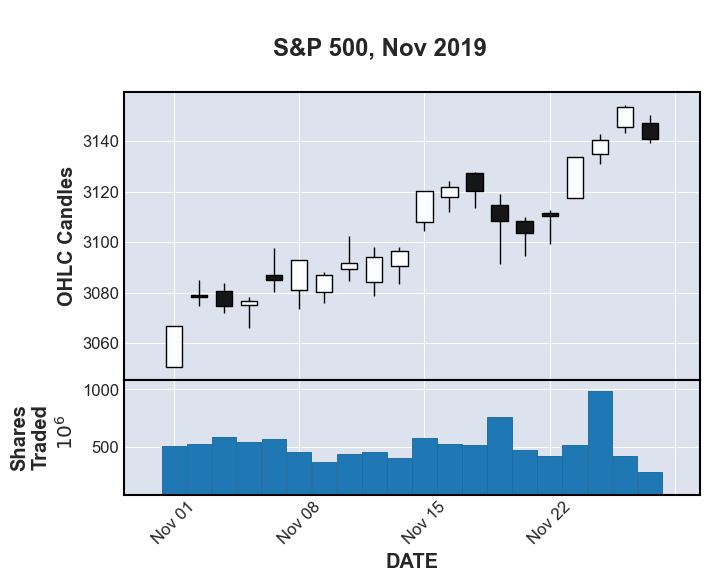

In [7]:
mpf.plot(daily,type='candle',volume=True,
         title='\nS&P 500, Nov 2019',
         ylabel='OHLC Candles',
         ylabel_lower='Shares\nTraded',
         xlabel='DATE')

---

#### Setting the x-axis datetime format and x-axis labels rotation:

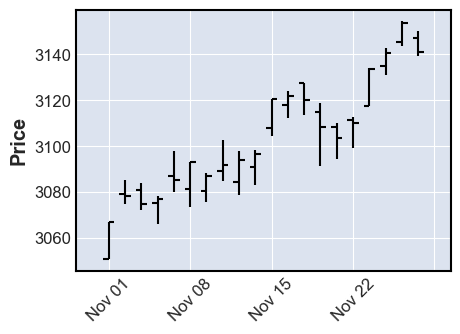

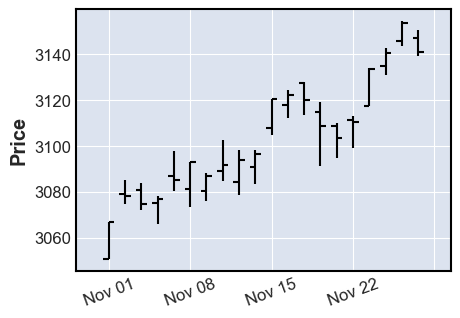

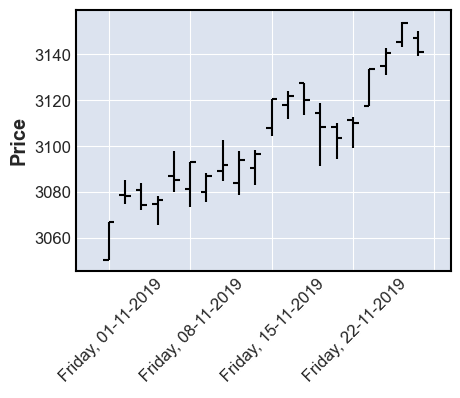

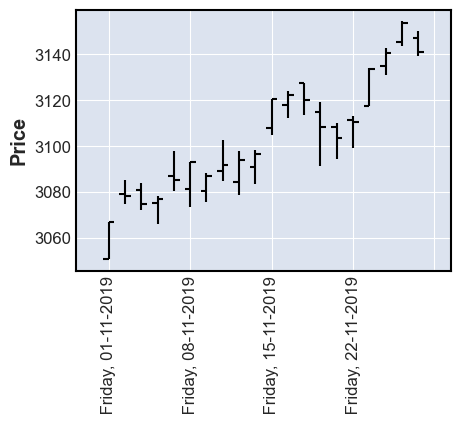

In [8]:
mpf.plot(daily,figscale=0.65)
mpf.plot(daily,figscale=0.65,xrotation=20)
mpf.plot(daily,figscale=0.65,datetime_format=' %A, %d-%m-%Y')
mpf.plot(daily,figscale=0.65,datetime_format=' %A, %d-%m-%Y',xrotation=90)

---

#### Setting linecolor for a line plot:

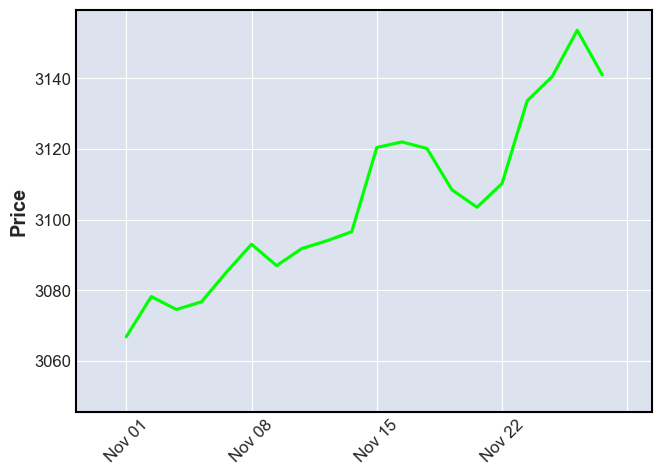

In [9]:
mpf.plot(daily, type='line', linecolor='#00ff00')

---

#### tight layout:

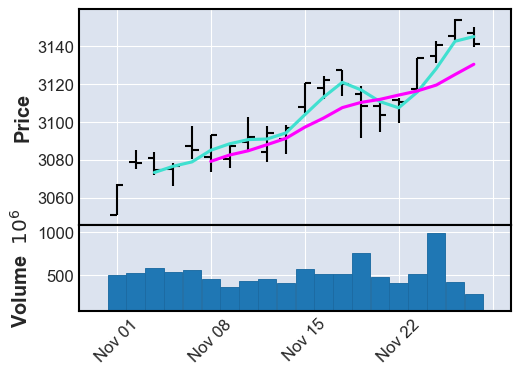

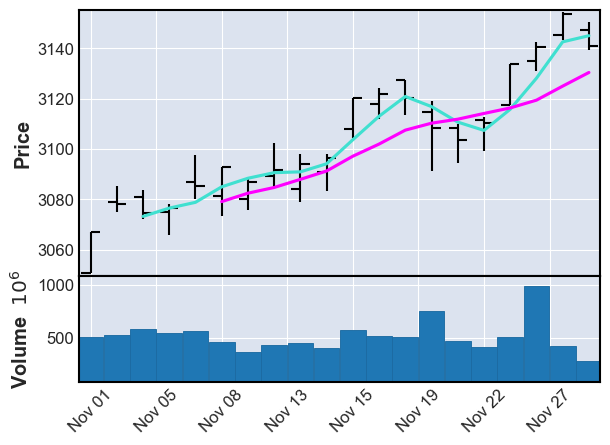

In [10]:
mpf.plot(daily,volume=True,figscale=0.75,mav=(3,6))
mpf.plot(daily,volume=True,figscale=0.75,mav=(3,6),tight_layout=True)

---

### fill_between

#### Usage:
- `fill_between=y1` 
  - `y1` is a single y value, or a series of y values the same length as your data frame.
- `fill_between=dict(y1=value(s),y2=0,where=None,**kwargs)`
  - `y2` defaults to 0, and is a single value, or series of values the same length as your data frame.
  - `where` is a boolean series the same length as your data frame.
  - `kwargs` are any additional kwargs accepted by matplotlib `Axes.fill_between()`.
  

#### Note that 
`mpf.plot()` kwarg `fill_between=` is similar to matplotlib method [`Axes.fill_between()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.fill_between.html)<br> **except** you **do** ***NOT*** specify the x-axis (**rather the x-axis is assumed to be the datetime index of your dataframe**)

#### Examples:



A single y-value or series **assumes** we fill between ZERO and that single y-value or series.

Therefore, scale down the data, close to zero, so that we can demonstrate specifying
a single y-value, or single y-series for fill_between:




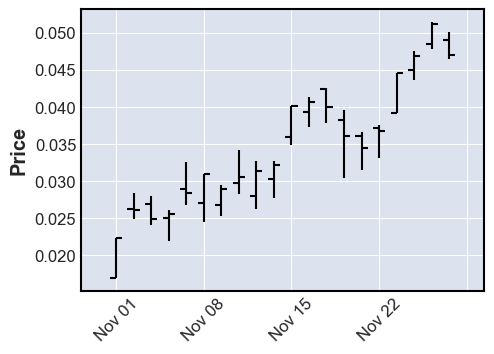

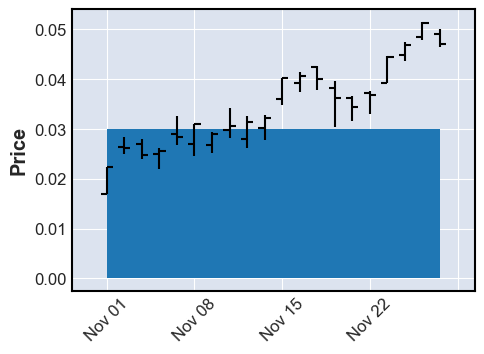

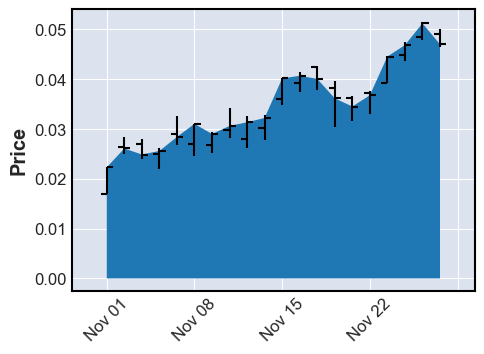

In [11]:
print('''

A single y-value or series **assumes** we fill between ZERO and that single y-value or series.

Therefore, scale down the data, close to zero, so that we can demonstrate specifying
a single y-value, or single y-series for fill_between:

''')
scaled_down_data = (daily/3000)-1.0

mpf.plot(scaled_down_data,figscale=0.7)
mpf.plot(scaled_down_data,figscale=0.7,fill_between=0.03)
mpf.plot(scaled_down_data,figscale=0.7,fill_between=scaled_down_data['Close'].values)



Use a dict to specify two y values or series (y1 and y2) for fill between:




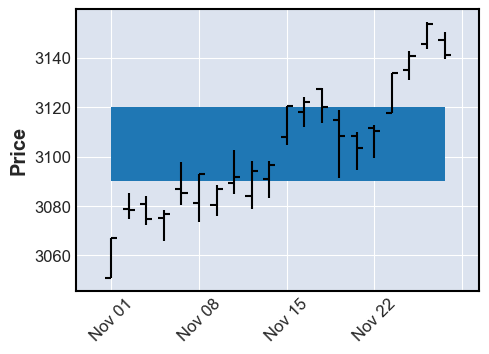

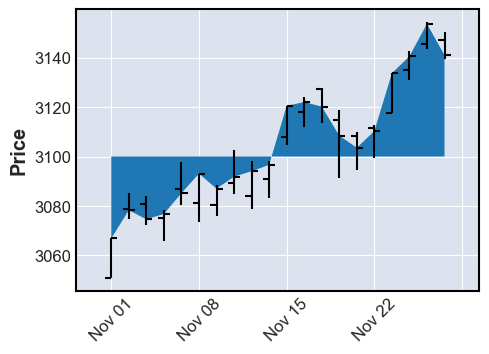

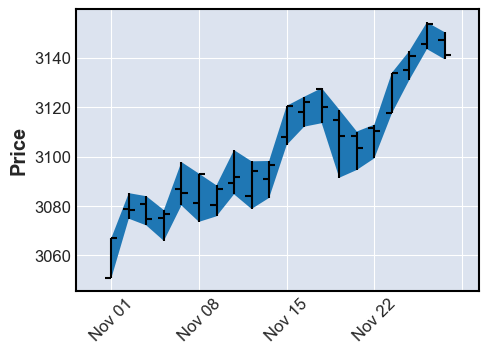

In [12]:
print('''

Use a dict to specify two y values or series (y1 and y2) for fill between:

''')

mpf.plot(daily,figscale=0.7,fill_between=dict(y1=3090,y2=3120))
mpf.plot(daily,figscale=0.7,fill_between=dict(y1=3100,y2=daily['Close'].values))
mpf.plot(daily,figscale=0.7,fill_between=dict(y1=daily['Low'].values,y2=daily['High'].values))



Use a dict to specify other attributes (kwargs) for fill_between:

To demonstrate use of the `where` kwarg to display a holding period,
we convert the datetime index into a dataframe, and use that to generate a boolean array:

where_values = pd.notnull(dates_df[ (dates_df>=buy_date) & (dates_df <= sell_date) ])['Date'].values




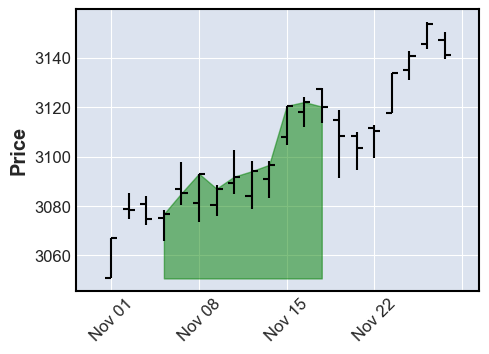

In [13]:
print('''

Use a dict to specify other attributes (kwargs) for fill_between:

To demonstrate use of the `where` kwarg to display a holding period,
we convert the datetime index into a dataframe, and use that to generate a boolean array:

where_values = pd.notnull(dates_df[ (dates_df>=buy_date) & (dates_df <= sell_date) ])['Date'].values

''')

dates_df     = pd.DataFrame(daily.index)
buy_date     = pd.Timestamp('2019-11-06')
sell_date    = pd.Timestamp('2019-11-19')
where_values = pd.notnull(dates_df[ (dates_df>=buy_date) & (dates_df <= sell_date) ])['Date'].values

y1values = daily['Close'].values
y2value  = daily['Low'].min()

mpf.plot(daily,figscale=0.7,
         fill_between=dict(y1=y1values,y2=y2value,where=where_values,alpha=0.5,color='g')
        )